In [1]:
import numpy as np
import cv2
from skimage import measure
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from pylab import imread, imshow, gray, mean
from matplotlib import cm

In [26]:
def to_find_angle_function(img,i):
    image = np.mean(img,axis=2)
    image = (image < 128)*255
    h, theta, d = hough_line(image)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6),subplot_kw={'adjustable': 'box'})
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    
    ax[1].imshow(image, cmap=cm.gray)
    for _,angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[1].set_xlim((0, image.shape[1]))
    ax[1].set_ylim((image.shape[0], 0))
    ax[1].set_axis_off()
    ax[1].set_title('Detected lines in image :'+str(i))
         

    plt.tight_layout()
    plt.show()

    angle=[]
    dist=[]
    for _, a , d in zip(*hough_line_peaks(h, theta, d)):
        angle.append(a)
        dist.append(d)

    angle = [a*180/np.pi for a in angle]
    angle_reel = np.max(angle) - np.min(angle)
    x = angle_reel - 100
    x = round(x)
    if x < 0:
        x = 90
    print(x)
    return x

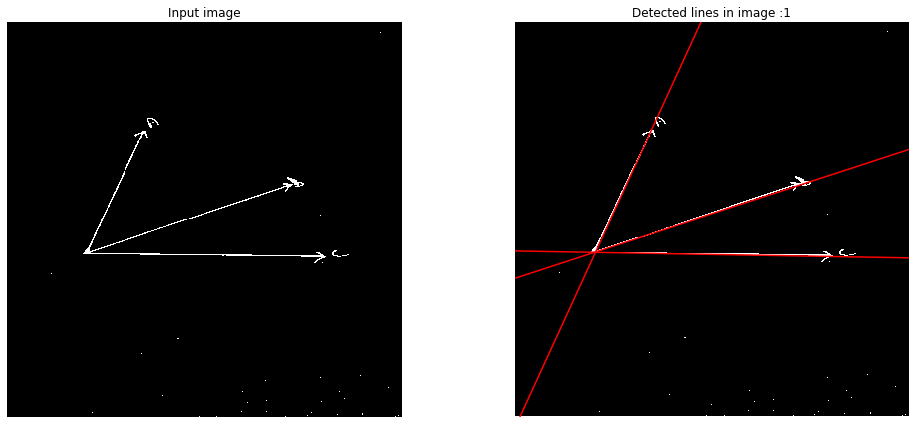

61.0


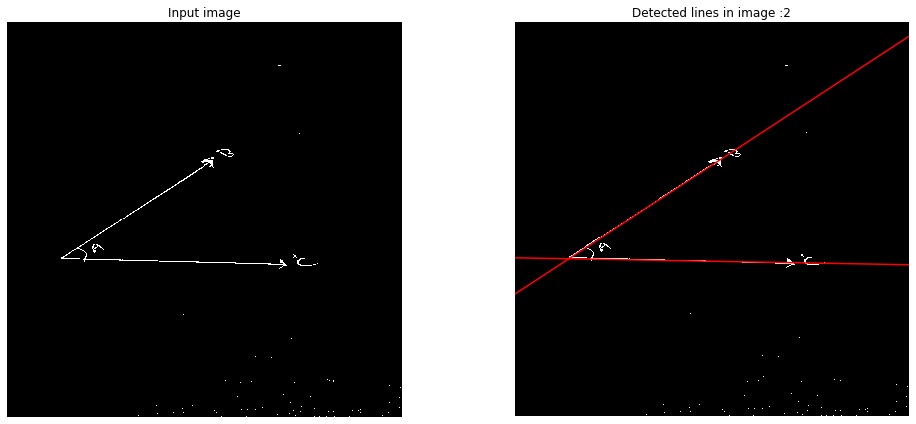

46.0


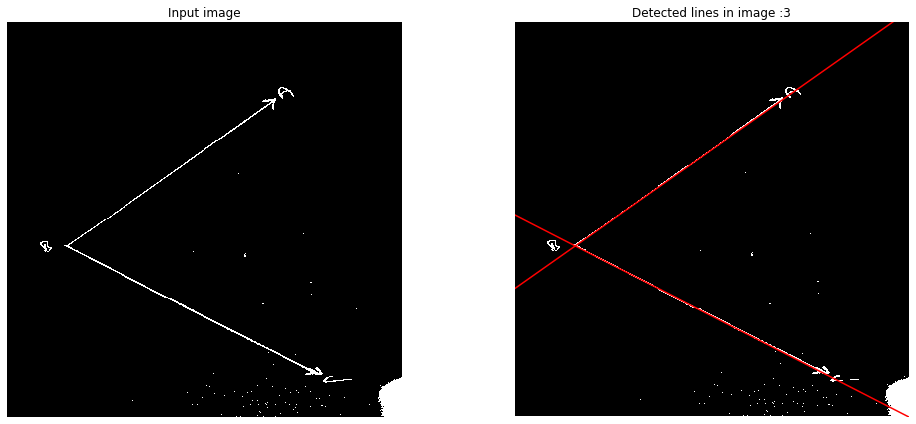

18.0


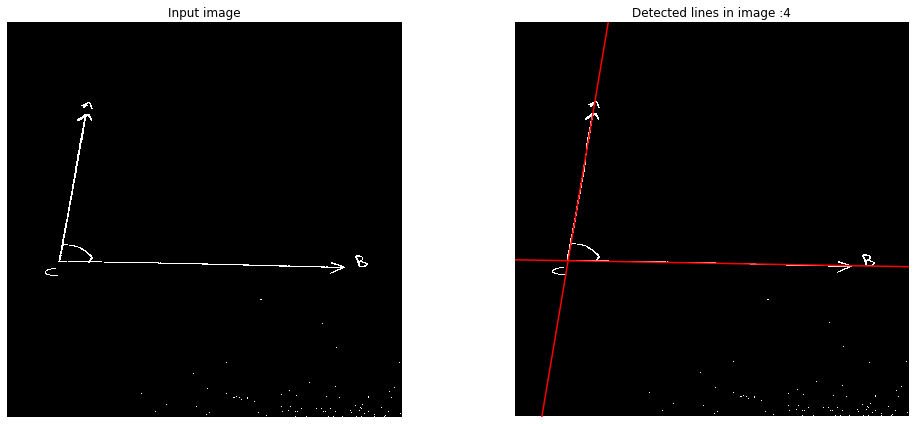

90


In [42]:
reshape= (400,400)
degress = {}
image_path = 'C:\\Users\\a\\Desktop\\h\\'
i = 1
import os
for filename in os.listdir(image_path):
    img = cv2.imread(os.path.join(image_path,filename))
    img =cv2.resize(img,reshape)
    x = to_find_angle_function(img,i)
    s = 'detected angle in image' + str(i)
    degress[s]=x  
    i = i+1

In [43]:
degress

{'detected angle in image 1': 61.0,
 'detected angle in image 2': 46.0,
 'detected angle in image 3': 18.0,
 'detected angle in image 4': 90}

4